In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import datetime as dat
import matplotlib as plt
import datetime as dt
import xgboost as xgb
%matplotlib inline
sns.set()

In [2]:
features_ventana1 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana1.csv',low_memory=False).set_index('ref_hash')
aux_ventana1 = pd.read_csv('../xgb/features_events_gonzalo_ventana1.csv').set_index('ref_hash')
features_ventana1=features_ventana1.join(aux_ventana1, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
#aux_ventana1 = pd.read_csv('../xgb/features_installs_gonzalo_ventana1.csv').set_index('ref_hash')
#features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_installs')
aux_ventana1 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana1.csv').set_index('ref_hash')
features_ventana1=features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_auctions')
features_ventana1 = features_ventana1.fillna(0)

labels_st_ventana1 = pd.read_csv('../xgb/labels_st_ventana1.csv').set_index('device_id')
ventana1 = features_ventana1.join(labels_st_ventana1, how = 'left').fillna(259200)#3 dias pasado a segundos

In [3]:
#pd.read_csv('../xgb/labels_st_ventana1.csv')

In [4]:
features_ventana2 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana2.csv').set_index('ref_hash')
aux_ventana2 = pd.read_csv('../xgb/features_events_gonzalo_ventana2.csv').set_index('ref_hash')
features_ventana2.join(aux_ventana2, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana2 = pd.read_csv('../xgb/features_installs_gonzalo_ventana2.csv').set_index('ref_hash')
features_ventana2.join(aux_ventana2, how = 'outer', rsuffix = '_installs')
aux_ventana2 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana2.csv').set_index('ref_hash')
features_ventana2=features_ventana2.join(aux_ventana2, how = 'outer', rsuffix = '_auctions')
features_ventana2 = features_ventana2.fillna(0)

labels_st_ventana2 = pd.read_csv('../xgb/labels_st_ventana2.csv').set_index('device_id')
ventana2 = features_ventana2.join(labels_st_ventana2, how = 'left').fillna(259200)#3 dias pasado a segundos

In [5]:
features_ventana3 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana3.csv').set_index('ref_hash')
aux_ventana3 = pd.read_csv('../xgb/features_events_gonzalo_ventana3.csv').set_index('ref_hash')
features_ventana3.join(aux_ventana3, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
aux_ventana3 = pd.read_csv('../xgb/features_installs_gonzalo_ventana3.csv').set_index('ref_hash')
features_ventana3=features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_installs')
aux_ventana3 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana3.csv').set_index('ref_hash')
features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_auctions')
features_ventana3 = features_ventana3.fillna(0)

labels_st_ventana3 = pd.read_csv('../xgb/labels_st_ventana3.csv').set_index('device_id')
ventana3 = features_ventana3.join(labels_st_ventana3, how = 'left').fillna(259200)#3 dias pasado a segundos

In [6]:
features_ventana4 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana4.csv').set_index('ref_hash')
aux_ventana4 = pd.read_csv('../xgb/features_events_gonzalo_ventana4.csv').set_index('ref_hash')
features_ventana4.join(aux_ventana4, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
ux_ventana4 = pd.read_csv('../xgb/features_installs_gonzalo_ventana4.csv').set_index('ref_hash')
features_ventana4=features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_installs')
aux_ventana4 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana4.csv').set_index('ref_hash')
features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_auctions')
features_ventana4 = features_ventana4.fillna(0)

labels_st_ventana4 = pd.read_csv('../xgb/labels_st_ventana4.csv').set_index('device_id')
ventana4 = features_ventana4.join(labels_st_ventana4, how = 'left').fillna(259200)#3 dias pasado a segundos

In [20]:
matriz = ventana1.append(ventana2,sort=False).append(ventana3,sort=False).append(ventana4,sort=False).reset_index('ref_hash')
matriz=matriz.drop(['attributed_min','attributed_max'],axis=1)

In [22]:
matriz=matriz[['ref_hash', 'latitude_sum', 'latitude_mean', 'latitude_std',
       'latitude_min', 'latitude_max', 'longitude_sum', 'longitude_mean',
       'longitude_std', 'longitude_min', 'longitude_max', 'timeToClick_sum',
       'timeToClick_mean', 'timeToClick_std', 'timeToClick_min',
       'timeToClick_max', 'hour_sum_clicks', 'hour_mean_clicks',
       'hour_std_clicks', 'hour_min_clicks', 'hour_max_clicks',
       'repeticiones_sum_clicks', 'repeticiones_mean_clicks',
       'repeticiones_std_clicks', 'repeticiones_min_clicks',
       'repeticiones_max_clicks', 'attributed_sum', 'attributed_mean',
       'attributed_std', 'carrier_sum', 'carrier_mean', 'carrier_std',
       'carrier_min', 'carrier_max', 'wifi_sum', 'wifi_mean', 'wifi_std',
       'wifi_min', 'wifi_max', 'hour_sum_events', 'hour_mean_events',
       'hour_std_events', 'hour_min_events', 'hour_max_events',
       'repeticiones_sum_events', 'repeticiones_mean_events',
       'repeticiones_std_events', 'repeticiones_min_events',
       'repeticiones_max_events', 'hour_sum', 'hour_mean', 'hour_std',
       'hour_min', 'hour_max', 'repeticiones_sum', 'repeticiones_mean',
       'repeticiones_std', 'repeticiones_min', 'repeticiones_max',
        'hour_sum_auctions', 'hour_mean_auctions',
       'hour_std_auctions', 'hour_min_auctions', 'hour_max_auctions',
       'repeticiones_sum_auctions', 'repeticiones_mean_auctions',
       'repeticiones_std_auctions', 'repeticiones_min_auctions',
       'repeticiones_max_auctions', 'application_id_sum',
       'application_id_mean', 'application_id_std', 'application_id_min',
       'application_id_max', 'hour_sum_installs', 'hour_mean_installs',
       'hour_std_installs', 'hour_min_installs', 'hour_max_installs',
       'repeticiones_sum_installs', 'repeticiones_mean_installs',
       'repeticiones_std_installs', 'repeticiones_min_installs',
       'repeticiones_max_installs', 'tiempo_hasta_aparicion']]

filas = matriz.shape[0]
matriz.head()
matriz.columns

Index(['ref_hash', 'latitude_sum', 'latitude_mean', 'latitude_std',
       'latitude_min', 'latitude_max', 'longitude_sum', 'longitude_mean',
       'longitude_std', 'longitude_min', 'longitude_max', 'timeToClick_sum',
       'timeToClick_mean', 'timeToClick_std', 'timeToClick_min',
       'timeToClick_max', 'hour_sum_clicks', 'hour_mean_clicks',
       'hour_std_clicks', 'hour_min_clicks', 'hour_max_clicks',
       'repeticiones_sum_clicks', 'repeticiones_mean_clicks',
       'repeticiones_std_clicks', 'repeticiones_min_clicks',
       'repeticiones_max_clicks', 'attributed_sum', 'attributed_mean',
       'attributed_std', 'carrier_sum', 'carrier_mean', 'carrier_std',
       'carrier_min', 'carrier_max', 'wifi_sum', 'wifi_mean', 'wifi_std',
       'wifi_min', 'wifi_max', 'hour_sum_events', 'hour_mean_events',
       'hour_std_events', 'hour_min_events', 'hour_max_events',
       'repeticiones_sum_events', 'repeticiones_mean_events',
       'repeticiones_std_events', 'repeticiones_min_

In [23]:
#matriz=matriz.drop(['attributed_min','attributed_max,application_id_max,application_id_mean,'],axis=1)
features = matriz.iloc[:,:-1]
features.head()

,ref_hash,latitude_sum,latitude_mean,latitude_std,latitude_min,latitude_max,longitude_sum,longitude_mean,longitude_std,longitude_min,...,hour_sum_installs,hour_mean_installs,hour_std_installs,hour_min_installs,hour_max_installs,repeticiones_sum_installs,repeticiones_mean_installs,repeticiones_std_installs,repeticiones_min_installs,repeticiones_max_installs
0,41863526108385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,161514654074162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,186034136943920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,360710529886978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,365882020742330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
labels = matriz.iloc[:,-1]

data_dmatrix = xgb.DMatrix(data=features,label=labels)
labels.head()

0    259200.000000
1    259200.000000
2        88.851558
3    245538.096215
4    259200.000000
Name: tiempo_hasta_aparicion, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, test_size=0.25, random_state=123)

In [26]:

xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 15, alpha = 100, n_estimators = 100,n_jobs=10,random_state=10,min_child_weight=10)#RMSE: 83251.466323

In [27]:
xg_reg.fit(train_features,train_labels)

XGBRegressor(alpha=100, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=15, min_child_weight=10, missing=None, n_estimators=100,
       n_jobs=10, nthread=None, objective='reg:linear', random_state=10,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [28]:
predicted_labels = xg_reg.predict(test_features)

In [29]:
rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels))
print("RMSE: %f" % (rmse))

RMSE: 99231.174138


## Importancia de los features (cuantas veces aparecen en los árboles)

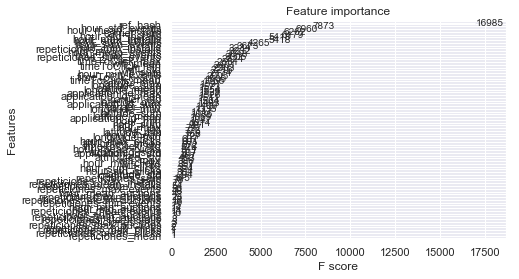

In [15]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [7, 11]
plt.show()

In [16]:
features_ventana7 = pd.read_csv('../xgb/features_clicks_gonzalo_ventana7.csv').set_index('ref_hash')
aux_ventana7 = pd.read_csv('../xgb/features_events_gonzalo_ventana7.csv').set_index('ref_hash')
features_ventana7.join(aux_ventana7, how = 'outer', lsuffix = '_clicks', rsuffix = '_events')
#aux_ventana7 = pd.read_csv('../xgb/features_installs_gonzalo_ventana7.csv').set_index('ref_hash')
#features_ventana7.join(aux_ventana7, how = 'outer', rsuffix = '_installs')
aux_ventana7 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana7.csv').set_index('ref_hash')
features_ventana7.join(aux_ventana7, how = 'outer', rsuffix = '_auctions')
features_ventana7=features_ventana7.fillna(0)

labels_ventana7 = pd.read_csv('../xgb/base_target_st.csv').set_index('ref_hash')
target = labels_ventana7

ventana7 = features_ventana7.join(labels_ventana7, how = 'right').fillna(0).reset_index().rename(index=str, columns={"device_id": "ref_hash"}) #3 dias pasado a segundos
ventana7.head()

,ref_hash,latitude_sum,latitude_mean,latitude_std,latitude_min,latitude_max,longitude_sum,longitude_mean,longitude_std,longitude_min,...,hour_mean,hour_std,hour_min,hour_max,repeticiones_sum,repeticiones_mean,repeticiones_std,repeticiones_min,repeticiones_max,obj
0,1000169251625791246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1000395625957344683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1003027494996471685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1006670001679961544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1007573308966476713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
features_ventana7 = ventana7.iloc[:,:-1]
labels_ventana7 = ventana7.iloc[:,-1]

In [18]:
data_dmatrix = xgb.DMatrix(data=features,label=labels)

In [19]:
features_ventana7=features_ventana7.drop(['attributed_min','attributed_max'],axis=1)
predicted_target_labels = xg_reg.predict(features_ventana7)

KeyError: "['attributed_min' 'attributed_max'] not found in axis"

In [ ]:
target.shape

In [ ]:
target['obj'] = predicted_target_labels

In [ ]:
target=target.sort_values(by='obj')

In [ ]:
target.to_csv('../xgb/target_st.csv')